In [1]:
import sys

import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

sys.path.extend(["../../../"])


# Import necessary libraries
from src.para_voro import *
from src.para_voro_plots import *


def gen_data(dim: int = 3, num_samples: int = 200):
    # Generate sample data for two intersecting clusters
    cluster1 = np.random.randn(num_samples, dim)
    cluster2 = np.random.randn(num_samples, dim)

    cluster1 = cluster1 + np.random.randint(2, size=dim) - 1
    cluster2 = cluster2 + np.random.randint(2, size=dim) - 1
    samples = np.vstack([cluster1, cluster2])

    # Add labels for the two clusters
    labels = np.array([0] * num_samples + [1] * num_samples)

    return samples, labels

In [2]:
np.random.seed(0)
dim = 2
n_samples = 7
samples, labels = np.random.random((n_samples, dim)), np.random.randint(0, 3, size=(n_samples, ))

samples = (samples - samples.min(0))
samples = samples / samples.max(0)

colors = make_object_array(get_12_categorical_colors())[[0, 2, 3]]
# colors = make_object_array(["green", "blue", "orange"])

aabbox = np.array([
    [-3.0, 3.0],
    [-3.0, 3.0],
    [-3.0, 3.0],
    [-3.0, 3.0],
    [-3.0, 3.0],
    [-3.0, 3.0],
    [-3.0, 3.0]
])[:dim]

aabbox = aabbox / 6.0
aabbox = aabbox + 0.5

bw = 0.01
bandwidths = np.array([
    bw, bw, bw, bw, bw, bw, bw, bw
])[:dim]

vor = Voronoi(samples)

plot data


c:\Users\bauer\Desktop\Projekte\VoroParaSense\examples\notebooks\plot_examples\../../..\src\para_voro_plots.py:89: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(samples[:, 0], samples[:, 1], color=colors, cmap='winter', s=5)


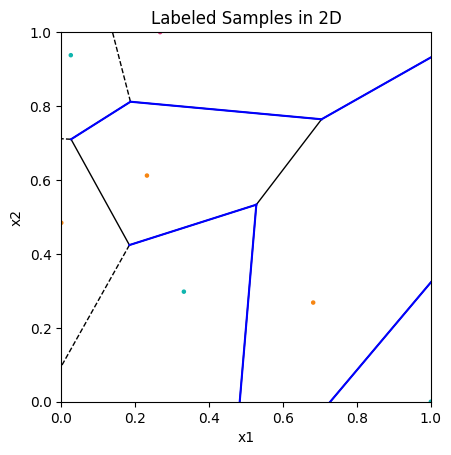

In [3]:
print("plot data")
if dim <= 3:
    f = plot_data(samples, labels, clip_box=aabbox, colors=colors)

compute ridge vertices
plot relevant ridges


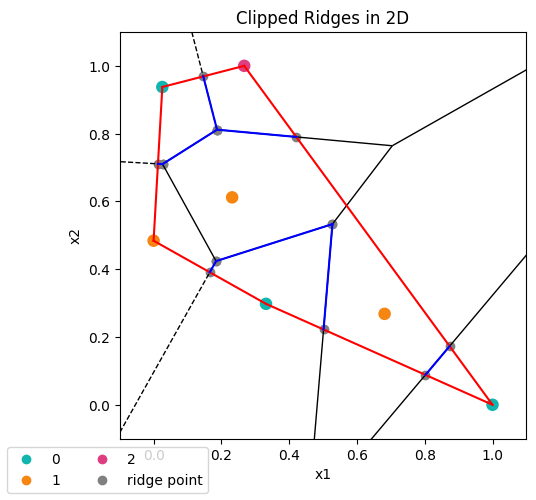

In [11]:
print("compute ridge vertices")
assert len(bandwidths) == len(aabbox) == dim
cch = True

ridge_vertices = generate_geometric_segment_boundaries_via_voronoi(samples=samples, labels=labels, clip_bbox=aabbox, clip_convex_hull=cch, verbose=False, vor=vor)
# ridge_vertices = make_object_array([np.array([[0.25, 0.0], [0.25, 0.5]]),
#                                     np.array([[0.0, 0.25], [0.5, 0.25]])], dtype=object)
print("plot relevant ridges")
if dim <= 3:
    f2 = plot_ridges(ridge_vertices, samples=samples, labels=labels, clip_convex_hull=cch, colors=colors, f=0.0, plot_legend=True, legend_kwargs=dict(ncol=2, loc='lower left'), plot=False)

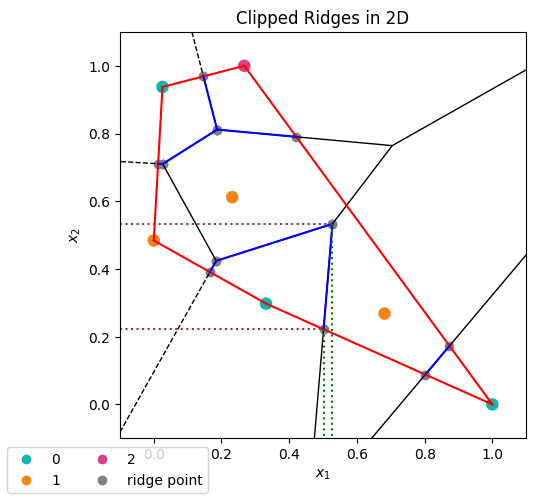

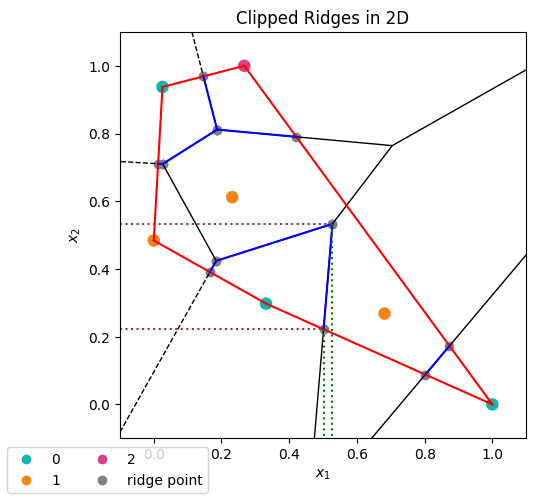

In [12]:
i = 1

plt.close(f2)
dim_names = ["$x_1$", "$x_2$"]
f2 = plot_ridges(ridge_vertices, samples=samples, labels=labels, clip_convex_hull=cch, colors=colors, f=0.0, plot_legend=True, legend_kwargs=dict(ncol=2), dim_names=dim_names, plot=False)
rv = ridge_vertices[i]

ax = f2.gca()

x0 = ax.get_xlim()[0]
y0 = ax.get_ylim()[0]

c = "brown"
c2 = "green"

#ax.scatter(rv[:, 0], rv[:, 1], c="black", s=2**7)
ax.plot([x0, rv[0,0]], [rv[0, 1], rv[0, 1]], c=c, ls=":")
ax.plot([x0, rv[1,0]], [rv[1, 1], rv[1, 1]], c=c, ls=":")

ax.plot([rv[0, 0], rv[0, 0]],  [rv[0, 1], y0], c=c2, ls=":")
ax.plot([rv[1, 0], rv[1, 0]], [rv[1, 1], y0], c=c2, ls=":")

f2

In [13]:
f2.gca().set_title("Clipping with Convex Hull")
f2.savefig("two_dimension_clipping2.pdf", bbox_inches="tight")

In [15]:
identify_infinity_regions_and_neighbors_results = identify_infinity_regions_and_neighbors(vor)
[point_idx_region_mapping, _, _, _, _] = identify_infinity_regions_and_neighbors_results

In [16]:
D_i_s, sample_points, sample_points_min, sample_points_max = compute_label_distribution(samples, labels, bandwidths, aabbox, clip_convex_hull=cch, verbose=True, vor=vor, identify_infinity_regions_and_neighbors_results=identify_infinity_regions_and_neighbors_results)

compute voronoi for 7 samples in dimensionality 2...
compute sample points...
skipping region with idx 0 as it does not map to a point


In [14]:
dim_names

['$x_1$', '$x_2$']

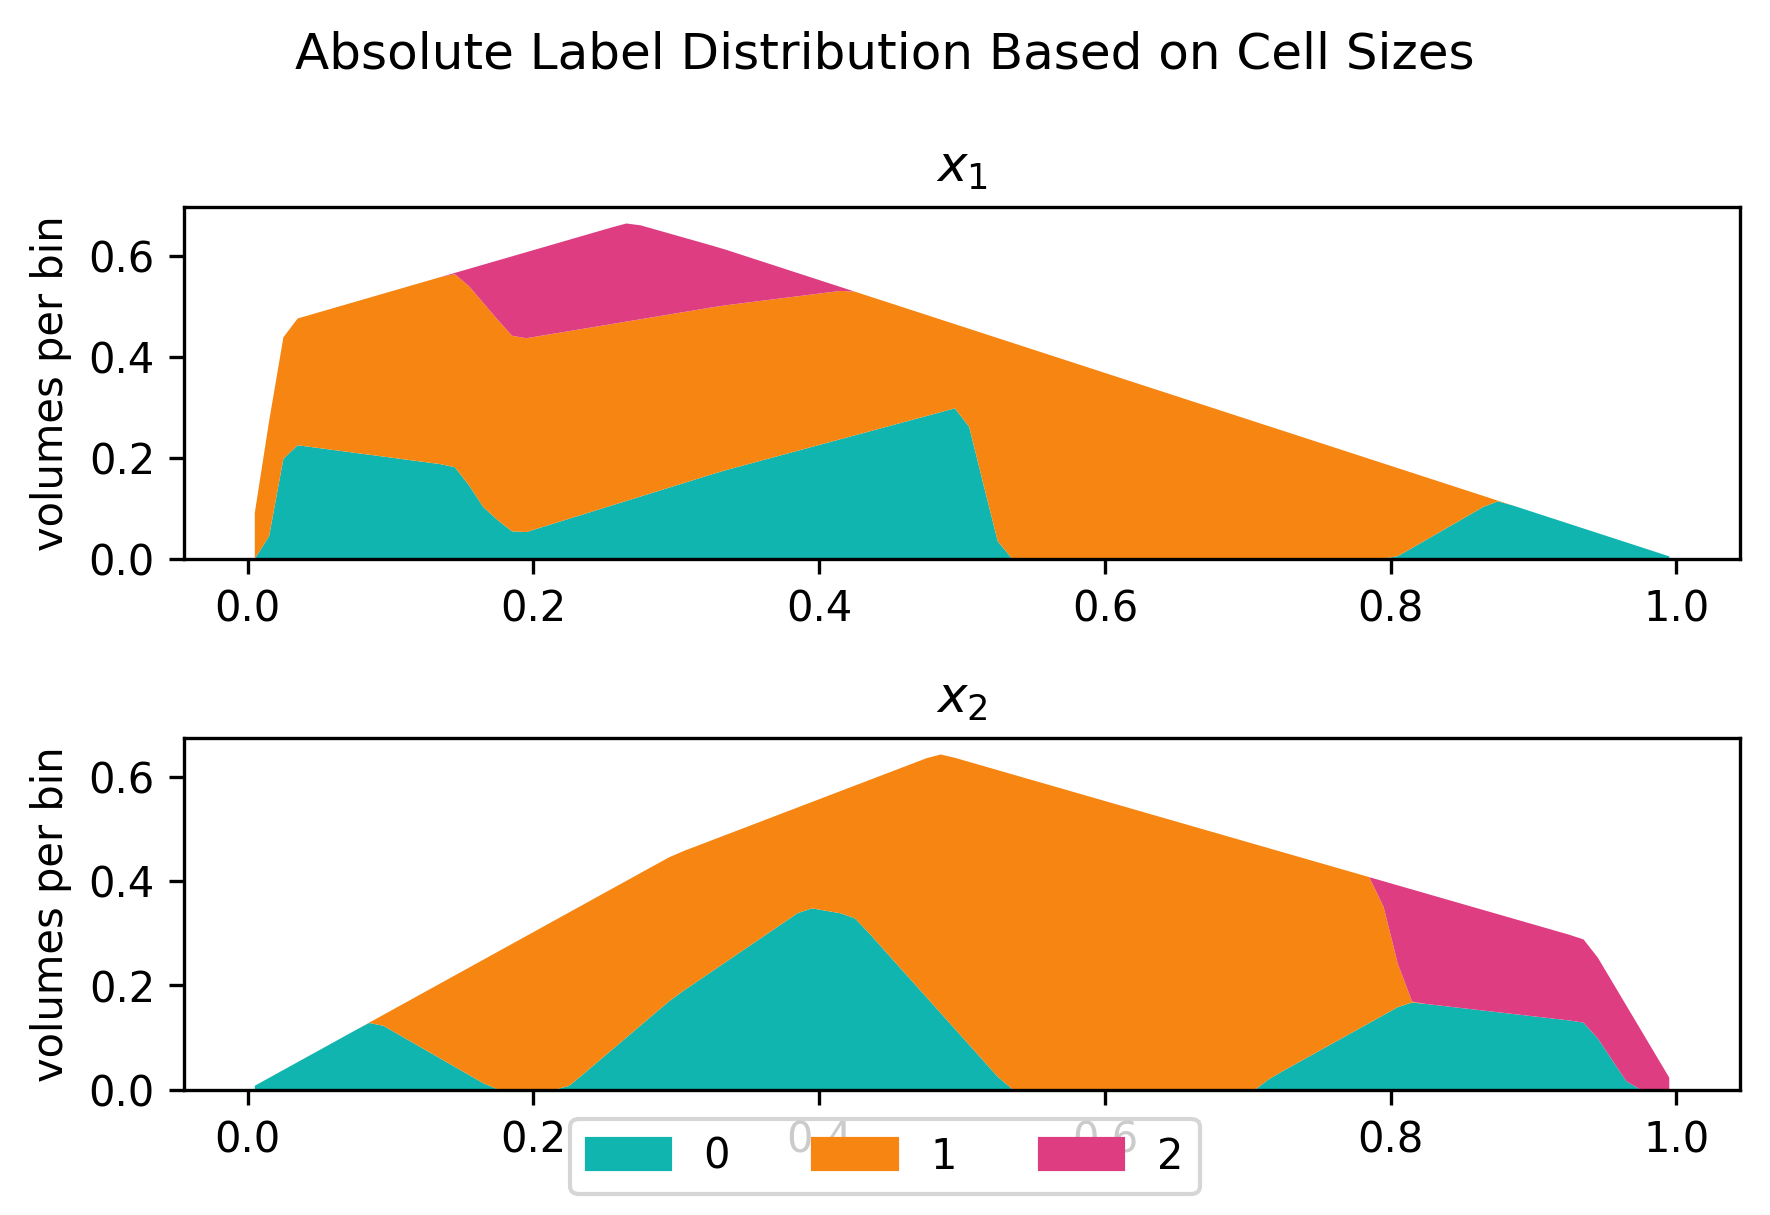

In [17]:
f = plot_label_distribution_matrix_list(sample_points[0:2], normalize_label_distribution_by_bandwidth(D_i_s, bandwidths), dim_labels=dim_names, line_labels=[f"{i}" for i in range(len(np.unique(labels)))],
                                    stack_plot_kwargs=dict(baseline='zero', colors=colors), horizontal_layout=False, fig_kwargs=dict(figsize=(6, 4)),
                                    legend_kwargs=dict(ncol=3, loc="lower center"), title="Absolute Label Distribution Based on Cell Sizes")

In [18]:
f.savefig("two-dim-labeldistr_example_x1x2.pdf")